In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data=pd.read_excel('最终版本数据（无城市代码）.xlsx')
data.head(5)


,性别,院校,点击量,是否上传本人照片,工作经验,教育水平,是否成功匹配接单（1表示接单，0表示没有接单）,prediction
0,1,985,1577,0,0.0,2,0,0.123897
1,1,985,1751,0,1.0,1,0,0.103828
2,1,985,1751,0,1.0,1,0,0.103828
3,2,111,1298,0,2.0,2,0,0.123578
4,1,111,1510,0,3.0,2,0,0.088878


D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38498 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26657 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-package

是否成功匹配接单（1表示接单，0表示没有接单）    1.000000
prediction                 0.263994
点击量                        0.203156
是否上传本人照片                   0.135429
教育水平                       0.072835
性别                         0.072686
院校                         0.059652
工作经验                       0.058987
Name: 是否成功匹配接单（1表示接单，0表示没有接单）, dtype: float64

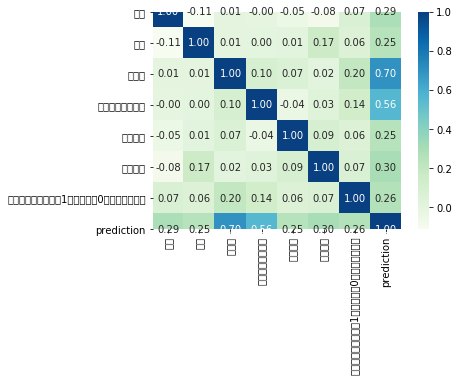

In [4]:
corr = data.corr()

## 寻找与delivery_charges相关性较强的字段

sns.heatmap(corr, cmap='GnBu',cbar=True, annot=True, square=True, fmt='.2f')
corr['是否成功匹配接单（1表示接单，0表示没有接单）'].sort_values(ascending=False)

In [5]:
# 划分数据，测试集，训练集
X = data.drop(["是否成功匹配接单（1表示接单，0表示没有接单）"],axis=1)
y = data["是否成功匹配接单（1表示接单，0表示没有接单）"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0)

In [11]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
# 线性回归模型训练
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test)
result={"prediction":model.predict(X)}
result=pd.DataFrame(result)
result.to_csv("线性回归结果.csv")


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# 随机森林模型训练
#用网格搜索法寻找最优参数param_grid
rf=RandomForestRegressor()
param_grid={ 'n_estimators':[5,10,20,50,100,200],
    'max_depth':[3,5,7],
    'max_features':[0.6,0.7,0.8,1]}

grid=GridSearchCV(rf,param_grid=param_grid,cv=3)
grid.fit(X_train,y_train)


In [14]:
# 最适合的参数
grid.best_params_

{}

In [ ]:
rf_reg=grid.best_estimator_

In [30]:
print('特征排序：')
feature_names=X.columns
feature_importances=rf_reg.feature_importances_
indices=np.argsort(feature_importances)[::-1]
for index in indices:
    print("feature %s (%f)"%(feature_names[index],feature_importances[index])) 

特征排序：
feature 点击量 (0.701674)
feature 工作经验 (0.146665)
feature 教育水平 (0.055634)
feature 院校 (0.050531)
feature 是否上传本人照片 (0.027413)
feature 性别 (0.018083)


([<matplotlib.axis.XTick at 0x28173d1a400>,
 <a list of 6 Text xticklabel objects>)

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38543 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26426 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26862 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26519 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22411 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-package

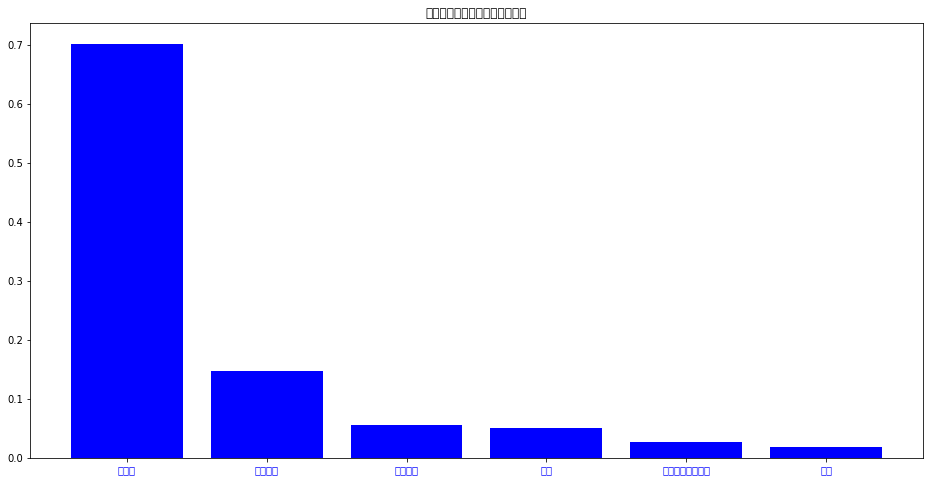

In [31]:
plt.figure(figsize=(16,8))
plt.title("随机森林模型不同特征的重要度")
plt.bar(range(len(feature_importances)),feature_importances[indices],color='b')
plt.xticks(range(len(feature_importances)),np.array(feature_names)[indices],color='b')

In [40]:
result={"label":y_test,"prediction":rf_reg.predict(X_test)}
result=pd.DataFrame(result)
result.to_csv("rf结果.csv")

In [42]:
# 算均方误差
MSE=metrics.mean_squared_error(y,rf_reg.predict(X))

In [43]:
MSE

0.057361067853680135

In [44]:
submission = {"predictionRF":rf_reg.predict(X)}
submission = pd.DataFrame(submission)

In [45]:
submission.head()

,predictionRF
0,0.225
1,0.000
2,0.000
3,0.000
4,0.100


In [46]:
submission.to_csv("RF数据提交.csv")